# Exploring CNR's data

Notebook to take a look at the data, prior to any work. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/X_train_v2.csv', index_col='ID')
y_train = pd.read_csv('data/Y_train_sl9m6Jh.csv', index_col='ID')

In [3]:
df.head()

,WF,Time,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,NWP1_12h_D-2_V,...,NWP4_00h_D-1_CLCT,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT
ID,,,,,,,,,,,,,,,,,,,,,
1,WF1,01/05/2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.254603,-0.289687,82.543144,NaN,NaN,NaN
2,WF1,01/05/2018 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.490908,-0.413370,99.990844,NaN,NaN,NaN
3,WF1,01/05/2018 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.997093,-1.415138,98.367235,NaN,NaN,NaN
4,WF1,01/05/2018 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.689598,-0.961441,94.860604,NaN,NaN,NaN
5,WF1,01/05/2018 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.290994,-0.294963,95.905879,NaN,NaN,NaN


## Focusing on production

Import of the train data and some plots of the production of each WF. 

In [4]:
y_train.head()

,Production
ID,
1,0.02
2,0.07
3,0.22
4,0.39
5,0.41


In [5]:
df = pd.concat([df, y_train], axis=1)
df.head()

,WF,Time,NWP1_00h_D-2_U,NWP1_00h_D-2_V,NWP1_00h_D-2_T,NWP1_06h_D-2_U,NWP1_06h_D-2_V,NWP1_06h_D-2_T,NWP1_12h_D-2_U,NWP1_12h_D-2_V,...,NWP4_12h_D-1_U,NWP4_12h_D-1_V,NWP4_12h_D-1_CLCT,NWP4_00h_D_U,NWP4_00h_D_V,NWP4_00h_D_CLCT,NWP4_12h_D_U,NWP4_12h_D_V,NWP4_12h_D_CLCT,Production
ID,,,,,,,,,,,,,,,,,,,,,
1,WF1,01/05/2018 01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.254603,-0.289687,82.543144,NaN,NaN,NaN,0.02
2,WF1,01/05/2018 02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.490908,-0.413370,99.990844,NaN,NaN,NaN,0.07
3,WF1,01/05/2018 03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.997093,-1.415138,98.367235,NaN,NaN,NaN,0.22
4,WF1,01/05/2018 04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.689598,-0.961441,94.860604,NaN,NaN,NaN,0.39
5,WF1,01/05/2018 05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.290994,-0.294963,95.905879,NaN,NaN,NaN,0.41


In [6]:
y_train = df.loc[:, ['Time', 'WF', 'Production']]
y_train = y_train.set_index('Time')
# Otherwise, the time column is a dumb index column
y_train.index = pd.to_datetime(y_train.index)
# Otherwise, dtype=Object=terrible
y_train['WF'] = y_train['WF'].astype('category')
y_train['WF'] = y_train['WF'].cat.rename_categories(range(1, 7))
y_train.head()

,WF,Production
Time,,
2018-01-05 01:00:00,1,0.02
2018-01-05 02:00:00,1,0.07
2018-01-05 03:00:00,1,0.22
2018-01-05 04:00:00,1,0.39
2018-01-05 05:00:00,1,0.41


In [7]:
y_train.loc[y_train['WF']==1]

,WF,Production
Time,,
2018-01-05 01:00:00,1,0.02
2018-01-05 02:00:00,1,0.07
2018-01-05 03:00:00,1,0.22
2018-01-05 04:00:00,1,0.39
2018-01-05 05:00:00,1,0.41
...,...,...
2019-01-15 20:00:00,1,0.45
2019-01-15 21:00:00,1,0.54
2019-01-15 22:00:00,1,0.05


Weekly generated power for each WF:

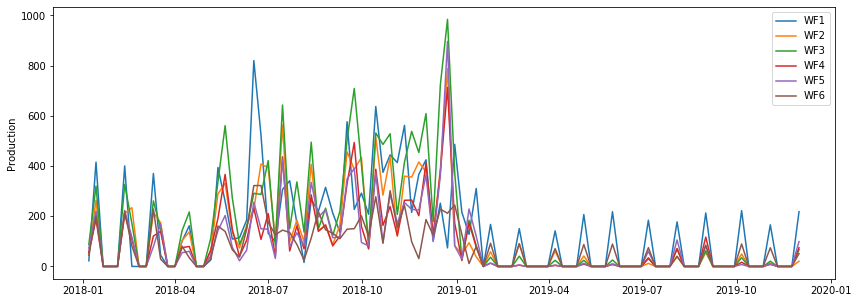

In [136]:
plt.figure(figsize=(14, 5))
for wf in set(y_train['WF']):
    # select WF
    data = y_train.loc[y_train['WF']==wf]
    # get weekly generated power
    data = data.resample('W').sum().dropna()
    sns.lineplot(data=data['Production'], label='WF%s' % wf)
plt.legend()
plt.ylabel('Production')
plt.show()

## Global information

There is quite a lot going in this part: mainly, we go from the above array with a more comprehensive indexing. That's quite verbose and tedious, but hope it will be useful.

Then, just a call to `head()` and `describe()` methods. 

In [1]:
from load_utils import load_train_data

In [6]:
df = load_train_data(time_index_only=True)

We enjoy the result: 

In [27]:
df.head()

WF                    1                                      ...    6          \
NWP                   1                                      ...    4           
D                    -2                                      ...   -1           
h                    0           6           12          18  ...   0   12       
var                   U   V   T   U   V   T   U   V   T   U  ... CLCT   U   V   
Time                                                         ...                
2018-01-05 01:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 02:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 03:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 04:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 05:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   

WF                                                                     
NWP                                                                    
D                                0                                     
h                               0                         12           
var                 CLCT         U         V        CLCT   U   V CLCT  
Time                                                                   
2018-01-05 01:00:00  NaN -0.154430 -0.656045   98.045259 NaN NaN  NaN  
2018-01-05 02:00:00  NaN  0.106245 -1.177738   97.257870 NaN NaN  NaN  
2018-01-05 03:00:00  NaN  0.357428 -1.034126  100.000000 NaN NaN  NaN  
2018-01-05 04:00:00  NaN  0.854734 -1.535890   99.945066 NaN NaN  NaN  
2018-01-05 05:00:00  NaN  0.988867 -2.683615  100.000000 NaN NaN  NaN  

[5 rows x 612 columns]

Accessing values can be done with the `xs` method. E.g, all the temperatures at 0h:

In [148]:
df.xs(('T', 0), level=('var', 'h'), axis=1)

NWP                         1                          3              \
D                          -2      -1       0         -2          -1   
Time                WF                                                 
2018-01-05 01:00:00 1     NaN     NaN  286.44        NaN         NaN   
2018-01-05 02:00:00 1     NaN     NaN  286.26        NaN         NaN   
2018-01-05 03:00:00 1     NaN     NaN  285.75  287.00000  287.000000   
2018-01-05 04:00:00 1     NaN     NaN  284.78        NaN         NaN   
2018-01-05 05:00:00 1     NaN     NaN  284.46        NaN         NaN   
...                       ...     ...     ...        ...         ...   
2019-01-15 20:00:00 6     NaN  274.00  274.34        NaN         NaN   
2019-01-15 21:00:00 6     NaN  273.72  273.71        NaN  275.578857   
2019-01-15 22:00:00 6     NaN  273.41  273.15        NaN         NaN   
2019-01-15 23:00:00 6     NaN  273.04  272.61        NaN         NaN   
2019-01-16 00:00:00 6   272.9  272.07  270.93  275.09436  275.026703   

NWP                                 
D                                0  
Time                WF              
2018-01-05 01:00:00 1          NaN  
2018-01-05 02:00:00 1          NaN  
2018-01-05 03:00:00 1   286.000000  
2018-01-05 04:00:00 1          NaN  
2018-01-05 05:00:00 1          NaN  
...                            ...  
2019-01-15 20:00:00 6          NaN  
2019-01-15 21:00:00 6   275.373444  
2019-01-15 22:00:00 6          NaN  
2019-01-15 23:00:00 6          NaN  
2019-01-16 00:00:00 6   274.628784  

[37375 rows x 6 columns]

## Looking at the temperature

There are, in the end, only 3 variables: 
* Wind speed and directions
* Temperature 
* Cloud cover

The format may be difficult to read at first, so let's look at the temperature first.

Those are the missing values per columns:

In [149]:
print('PROPORTION OF MISSING VALUES PER COLUMN')
df.xs('T', level='var', axis=1).isna().mean()

PROPORTION OF MISSING VALUES PER COLUMN


NWP  D   h 
1    -2  0     0.464589
         6     0.214368
         12    0.007545
         18    0.007545
     -1  0     0.007545
         6     0.003692
         12    0.003692
         18    0.003692
      0  0     0.003853
         6     0.249953
         12    0.499853
         18    0.749886
3    -2  0     0.791625
         6     0.708254
         12    0.666569
         18    0.667692
     -1  0     0.666569
         6     0.666569
         12    0.666729
         18    0.667692
      0  0     0.666569
         6     0.749940
         12    0.833284
         18    0.916950
dtype: float64

### Split Apply Combine

We will make use of the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) paradigm: 

In [150]:
wf_group = df.groupby('WF', level=0)

In [151]:
for name, group in wf_group:
    print(name, end=' ')

1 2 3 4 5 6 

First, let's do that on the WF1: 

In [152]:
wf_1 = df.xs(1, level='WF')
wf_1.head()

NWP                   1                                      ...    4          \
D                    -2                                      ...   -1           
h                    0           6           12          18  ...   0   12       
var                   U   V   T   U   V   T   U   V   T   U  ... CLCT   U   V   
Time                                                         ...                
2018-01-05 01:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 02:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 03:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 04:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   
2018-01-05 05:00:00 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN NaN NaN   

NWP                                                                   
D                                0                                    
h                               0                        12           
var                 CLCT         U         V       CLCT   U   V CLCT  
Time                                                                  
2018-01-05 01:00:00  NaN  1.254603 -0.289687  82.543144 NaN NaN  NaN  
2018-01-05 02:00:00  NaN  2.490908 -0.413370  99.990844 NaN NaN  NaN  
2018-01-05 03:00:00  NaN  0.997093 -1.415138  98.367235 NaN NaN  NaN  
2018-01-05 04:00:00  NaN  0.689598 -0.961441  94.860604 NaN NaN  NaN  
2018-01-05 05:00:00  NaN  0.290994 -0.294963  95.905879 NaN NaN  NaN  

[5 rows x 102 columns]

### Merge predictions

We select the temperature: 

In [153]:
temp_df = wf_1.xs('T', level='var', axis=1)
temp_df.head()

NWP                   1                                          ...      3  \
D                    -2              -1                   0      ...     -2   
h                    0   6   12  18  0   6   12  18      0   6   ...     12   
Time                                                             ...          
2018-01-05 01:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  286.44 NaN  ...    NaN   
2018-01-05 02:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  286.26 NaN  ...    NaN   
2018-01-05 03:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  285.75 NaN  ...  286.0   
2018-01-05 04:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  284.78 NaN  ...    NaN   
2018-01-05 05:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  284.46 NaN  ...    NaN   

NWP                                                                        
D                              -1                           0              
h                       18     0      6      12     18     0   6   12  18  
Time                                                                       
2018-01-05 01:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  
2018-01-05 02:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  
2018-01-05 03:00:00  287.0  287.0  287.0  287.0  286.0  286.0 NaN NaN NaN  
2018-01-05 04:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  
2018-01-05 05:00:00    NaN    NaN    NaN    NaN    NaN    NaN NaN NaN NaN  

[5 rows x 24 columns]

**We merge all models (NWP) and all predictions (D), at every hours (h)**. This gets much simpler:

In [154]:
temp_df_mean = temp_df.mean(axis=1)
temp_df_mean.head()

Time
2018-01-05 01:00:00    286.440
2018-01-05 02:00:00    286.260
2018-01-05 03:00:00    286.575
2018-01-05 04:00:00    284.780
2018-01-05 05:00:00    284.460
dtype: float64

We can plot that daywise: 

In [155]:
# temp_df_day = temp_df.resample('D').mean()
temp_df_day = temp_df_mean.groupby(temp_df_mean.index.date).mean()

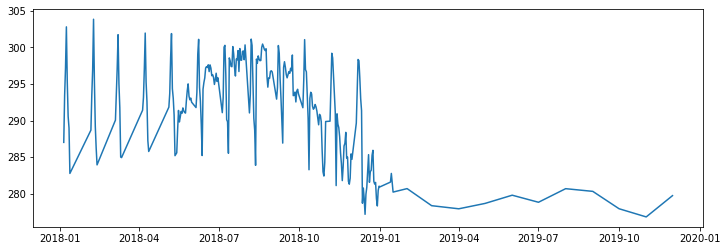

In [156]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=temp_df_day)
plt.show()

The end of the temperature is wrong; there must be more missing values at the hot hours of the day for July, 2019.

In [157]:
def hourly_missing(dataframe):
    return dataframe.isna().mean(axis=1).groupby(dataframe.index.hour).mean()

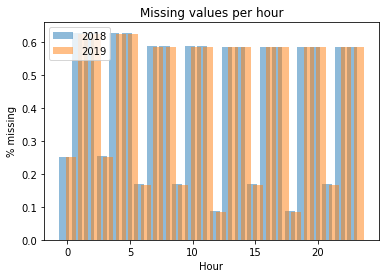

In [158]:
plt.bar(x=np.arange(24) - 0.25, height=hourly_missing(temp_df[temp_df.index.year == 2018]), alpha=.5, label=2018)
plt.bar(x=np.arange(24) + .25, height=hourly_missing(temp_df[temp_df.index.year == 2019]), alpha=.5, label=2019)
plt.title("Missing values per hour")
plt.xlabel('Hour')
plt.ylabel('% missing')
plt.legend()
plt.show()

It seems not... let's check whether it production looks the same:

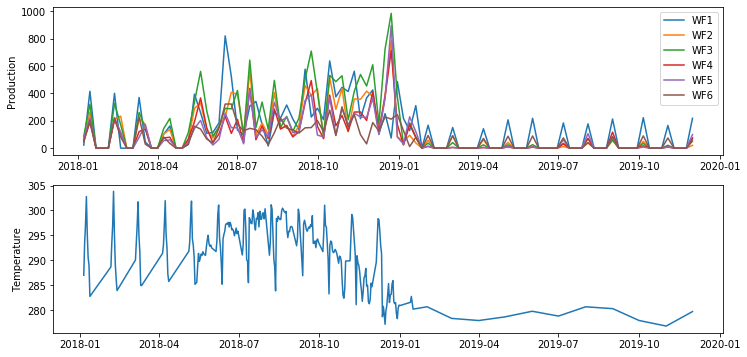

In [178]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
for wf in set(y_train['WF']):
    # select WF
    data = y_train.loc[y_train['WF']==wf]
    # get weekly generated power
    data = data.resample('W').sum().dropna()
    sns.lineplot(data=data['Production'], label='WF%s' % wf, ax=axes[0])
axes[0].set_ylabel('Production')
axes[0].legend()
sns.lineplot(data=temp_df_day, ax=axes[1])
axes[1].set_ylabel('Temperature')
plt.show()

### Comparing the two providers

This is done with:

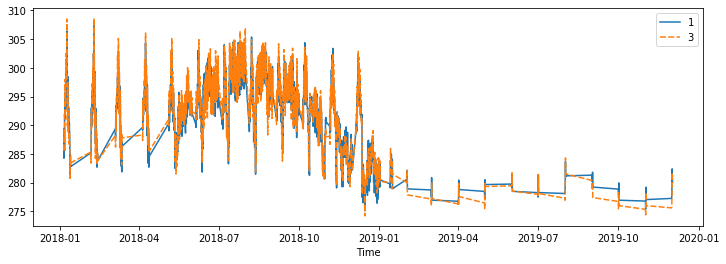

In [159]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=temp_df.mean(level='NWP', axis=1))
plt.show()

The two are fairly concordant.

### Comparing D-2 D-1 D prediction

This is done with:

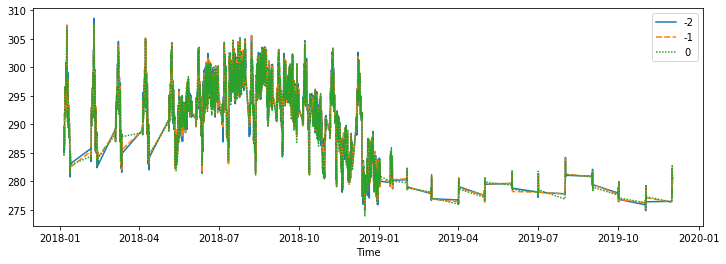

In [160]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=temp_df.mean(level='D', axis=1))
plt.show()

### Keeping Temperature only : all windfarms

Let's plot it for all windfarms. 

In [161]:
def get_temp(ind, table=df):
    wf = table.xs(ind, level=('WF'))
    temp = wf.xs('T', level='var', axis=1)
    #temp = np.mean(temp, axis=1)
    #temp = temp.resample('W').mean().dropna()
    return temp


In [162]:
result = {}
for wf in range(1, 7):
    result['WF%d'%wf] = get_temp(wf, df)

In [163]:
#TODO: To update

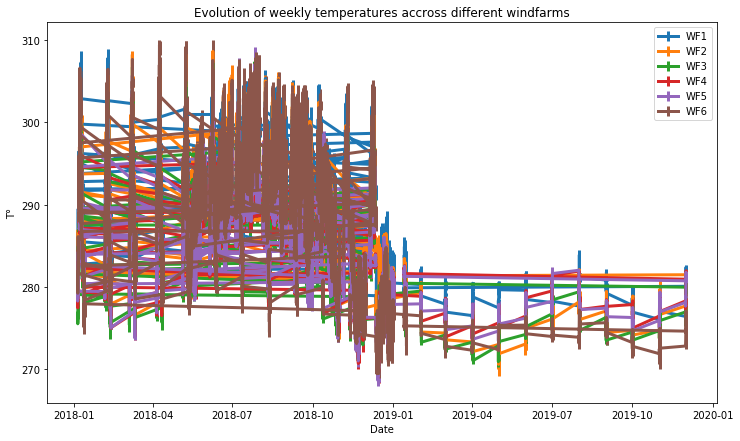

In [168]:
fig, ax = plt.subplots(figsize=(12, 7))

for wf, data in result.items():
    ax.errorbar(x=data.index, y=data.mean(axis=1), yerr=data.std(axis=1), lw=3, label='%s'%wf)
ax.legend()
ax.set_title('Evolution of weekly temperatures accross different windfarms')
ax.set_xlabel('Date')
ax.set_ylabel('T°')
plt.show()

Not such a big change accross WF...

## Looking at the cloud cover

We simply do the same with the cloud cover metric. Note that only Prediction model 4 gives this metric. 

In [140]:
def get_CLCT(ind, table=df):
    wf = table.xs(ind, level=('WF'))
    var = wf.xs('CLCT', level='var', axis=1)
    #temp = np.mean(temp, axis=1)
    #temp = temp.resample('W').mean().dropna()
    return var

In [141]:
result = {}
for wf in range(1, 7):
    result['WF%d'%wf] = get_CLCT(wf, df)

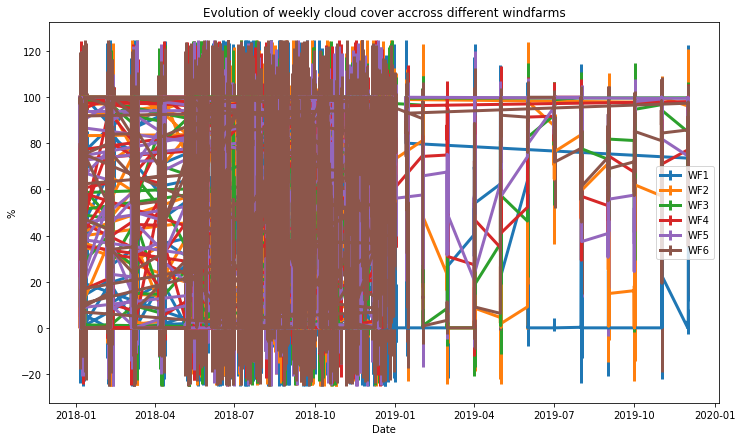

In [142]:
fig, ax = plt.subplots(figsize=(12, 7))

for wf, data in result.items():
    ax.errorbar(x=data.index, y=data.mean(axis=1), yerr=data.std(axis=1), lw=3, label='%s'%wf)
ax.legend()
ax.set_title('Evolution of weekly cloud cover accross different windfarms')
ax.set_xlabel('Date')
ax.set_ylabel('%')
plt.show()